In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

predicted_labels = np.load("./ndsb_dataset_nounk/predicted_labels_nounk.npy")
#predicted_labels = np.argmax(predictions, axis=1)

real_labels = np.load("./ndsb_dataset_nounk/real_labels_nounk.npy")

measures = np.load("focus_measure_ndsb_nounk.npy")

data = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures[:,0], 'lapm':measures[:,1], 'teng':measures[:,2], 'gblvar':measures[:,3], 'totvar':measures[:,4]})

data.head()

,gblvar,lapm,lapv,predicted,real,teng,totvar
0,0.006911,0.053208,0.029542,104,97,0.209141,8766.938122
1,0.011892,0.040871,0.021628,5,49,0.134877,8633.610549
2,0.027473,0.032796,0.007352,14,14,0.089224,8530.512437
3,0.052944,0.033605,0.010459,110,110,0.122677,7975.755898
4,0.000982,0.019520,0.004816,40,40,0.012485,8978.085836


In [4]:
true_false = np.zeros(len(real_labels), dtype=int)
for i in range(len(real_labels)):
    if predicted_labels[i] == real_labels[i]:
        true_false[i] = 1

In [6]:
measures_log = np.log(measures)

data_log = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures_log[:,0], 'lapm':measures_log[:,1], 'teng':measures_log[:,2], 'gblvar':measures_log[:,3], 'totvar':measures_log[:,4]})

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


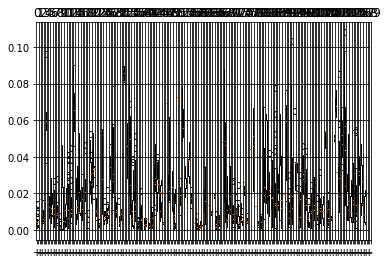

In [8]:
f, a = plt.subplots(1,120, sharex=False, sharey=True)

for i in range(120):
    box_true = data[data['predicted'] == i][data['real'] == i]['gblvar']
    box_false = data[data['predicted'] != i][data['real'] == i]['gblvar']
    a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'])
    a[i].set_title(i)
    
f.subplots_adjust(hspace=0)
plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


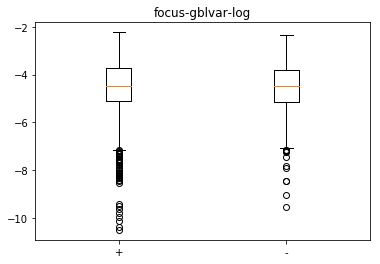

In [10]:
f, a = plt.subplots()
box_true = data_log[data_log['predicted'] == data_log['real']]['gblvar']
box_false = data_log[data_log['predicted'] != data_log['real']]['gblvar']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('focus-gblvar-log')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


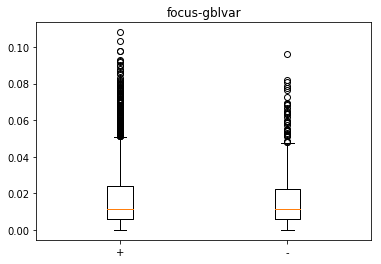

In [11]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['gblvar']
box_false = data[data['predicted'] != data['real']]['gblvar']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('focus-gblvar')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


loading 14
loading 15
loading 16
loading 17
loading 18
loading 19
loading 20
loading 21
loading 22
loading 23
loading 24
loading 25
loading 26


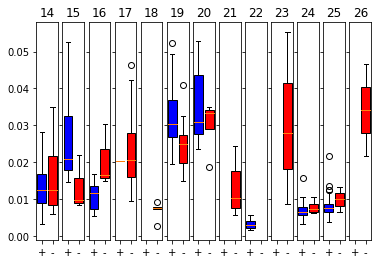

In [12]:
f, a = plt.subplots(1,13, sharex=False, sharey=True)

colors = ['blue', 'red']

for i in range(13):
    j = i+14
    box_true = data[data['predicted'] == j][data['real'] == j]['gblvar']
    box_false = data[data['predicted'] != j][data['real'] == j]['gblvar']
    print("loading", j)
    bplot = a[i].boxplot([box_true, box_false], widths=0.8, labels=['+', '-'],patch_artist=True)
    a[i].set_title(j)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,1], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax.set_xlabel('Variance of Laplacian')
ax.set_ylabel('Modified Laplacian')

In [ ]:
fig1, ax1 = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax1.set_xlabel('Variance of Laplacian')
ax1.set_ylabel('Tenengrad')

In [ ]:
fig2, ax2 = plt.subplots()
plt.scatter(measures_log[:,1], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax2.set_xlabel('Modified Laplacian')
ax2.set_ylabel('Tenengrad')

In [ ]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,0], true_false, s=0.6)

ax3.set_xlabel('Variance of Laplacian')
ax3.set_ylabel('Predições negativas e positivas')

In [ ]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,1], true_false, s=0.5)

ax3.set_xlabel('Modified Laplacian')
ax3.set_ylabel('Predições positivas')

In [ ]:
fig3, ax3 = plt.subplots()
plt.scatter(measures_log[:,2], true_false, s=0.5)

ax3.set_xlabel('Tenengrad')
ax3.set_ylabel('Predições positivas')

In [ ]:
predicted_labels = np.load("./laps_nobg_100/predictions.npy")
#predicted_labels = np.argmax(predictions, axis=1)

real_labels = np.load("./laps_nobg_100/real_labels.npy")

measures = np.load("focus_valid_laps.npy")

data = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures[:,0], 'lapm':measures[:,1], 'teng':measures[:,2]})

data 

In [ ]:
f, a = plt.subplots(1,20, sharex=False, sharey=True)

for i in range(20):
    box_true = data[data['predicted'] == i][data['real'] == i]['teng']
    box_false = data[data['predicted'] != i][data['real'] == i]['teng']
    a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'])
    a[i].set_title(i)
    
f.subplots_adjust(hspace=0)
plt.show()


In [ ]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['lapv']
box_false = data[data['predicted'] != data['real']]['lapv']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['lapm']
box_false = data[data['predicted'] != data['real']]['lapm']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['teng']
box_false = data[data['predicted'] != data['real']]['teng']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('total')
    
f.subplots_adjust(hspace=0)
plt.show()

In [ ]:
true_false = np.zeros(len(real_labels), dtype=int)
for i in range(len(real_labels)):
    if predicted_labels[i] == real_labels[i]:
        true_false[i] = 1
measures_log = np.log(measures)

fig10, ax10 = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,1], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax10.set_xlabel('Variance of Laplacian')
ax10.set_ylabel('Modified Laplacian')

In [ ]:
fig2, ax2 = plt.subplots()
plt.scatter(measures_log[:,1], measures_log[:,2], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax2.set_xlabel('Modified Laplacian')
ax2.set_ylabel('Tenengrad')

In [13]:
import gzip
train_path = "./laps_nobg_100/images_train.npy.gz"
#labels_path = "./laps_nobg_100/labels_train.npy.gz"
#with gzip.open(labels_path, "rb") as f:
#    labels = np.load(f)

#train_idx = np.load("./laps_nobg_100/indices_train.npy")
valid_idx = np.load("./laps_nobg_100/indices_valid.npy")

with gzip.open(train_path, "rb") as f:
    imgs = np.load(f)
    
img_valid = imgs[valid_idx]


gblvar          0.011892
lapm            0.040871
lapv            0.021628
predicted       5.000000
real           49.000000
teng            0.134877
totvar       8633.610549
Name: 1, dtype: float64


<function matplotlib.pyplot.show>

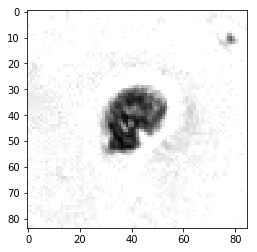

In [14]:
print(data.iloc[1])
plt.imshow(img_valid[1], cmap='gray')
plt.show

gblvar          0.068172
lapm            0.045289
lapv            0.007645
predicted     110.000000
real          110.000000
teng            0.083237
totvar       7758.458907
Name: 22, dtype: float64


<function matplotlib.pyplot.show>

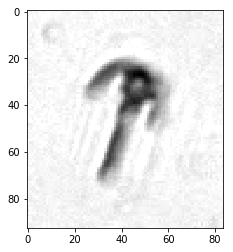

In [15]:
print(data.iloc[22])
plt.imshow(img_valid[22], cmap='gray')
plt.show

gblvar          0.032150
lapm            0.030839
lapv            0.005925
predicted     108.000000
real          108.000000
teng            0.172301
totvar       8409.559264
Name: 5, dtype: float64


<function matplotlib.pyplot.show>

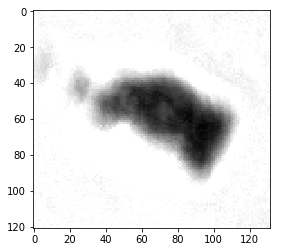

In [16]:
print(data.iloc[5])
plt.imshow(img_valid[5], cmap='gray')
plt.show

gblvar          0.010297
lapm            0.037531
lapv            0.004650
predicted      11.000000
real           11.000000
teng            0.030218
totvar       8778.172595
Name: 512, dtype: float64


<function matplotlib.pyplot.show>

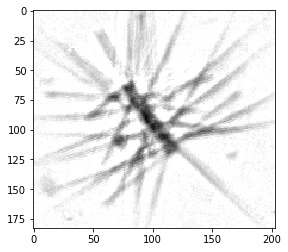

In [17]:
print(data.iloc[512])
plt.imshow(img_valid[512], cmap='gray')
plt.show

gblvar          0.009930
lapm            0.044036
lapv            0.017222
predicted     113.000000
real          113.000000
teng            0.176339
totvar       8586.575294
Name: 506, dtype: float64


<function matplotlib.pyplot.show>

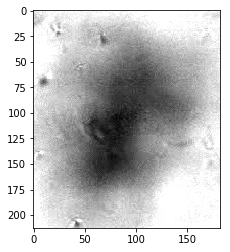

In [18]:
print(data.iloc[506])
plt.imshow(img_valid[506], cmap='gray')
plt.show

In [ ]:
import scipy.ndimage

In [ ]:
gblvar = scipy.ndimage.uniform_filter(img_valid[1])

In [ ]:
gblvar


In [ ]:
np.var(gblvar)